## Unsupervised learning: Gaussian Mixture Model

Part of the present material can be found [here](https://towardsdatascience.com/gaussian-mixture-model-clearly-explained-115010f7d4cf)

We here see how a Gaussian Mixed Model can be built from scratch.

In [1]:
import numpy as np

n_samples = 100
mu1, sigma1 = -5, 1.2 
mu2, sigma2 = 5, 1.8 
mu3, sigma3 = 0, 1.6 

x1 = np.random.normal(loc = mu1, scale = np.sqrt(sigma1), size = n_samples)
x2 = np.random.normal(loc = mu2, scale = np.sqrt(sigma2), size = n_samples)
x3 = np.random.normal(loc = mu3, scale = np.sqrt(sigma3), size = n_samples)

X = np.concatenate((x1,x2,x3))

In [2]:
from scipy.stats import norm

def plot_pdf(mu,sigma,label,alpha=0.5,linestyle='k--',density=True):
    """
    Plot 1-D data and its PDF curve.

    """
    # Compute the mean and standard deviation of the data

    # Plot the data
    
    X = norm.rvs(mu, sigma, size=1000)
    
    plt.hist(X, bins=50, density=density, alpha=alpha,label=label)

    # Plot the PDF
    x = np.linspace(X.min(), X.max(), 1000)
    y = norm.pdf(x, mu, sigma)
    plt.plot(x, y, linestyle)

In [3]:
import matplotlib.pyplot as plt

def plot_pdfs(mus, sigmas, labels, alpha=0.5, linestyle='k--', density=True):
    fig, ax = plt.subplots()
    for mu, sigma, label in zip(mus, sigmas, labels):
        plot_pdf(mu, sigma, label, alpha,linestyle, density) 
    ax.set_xlim(-10, 10)
    ax.set_ylim(0, 1)
    plt.legend()
    plt.show()

In [4]:
def random_init(n_compenents):
    
    """Initialize means, weights and variance randomly 
      and plot the initialization
    
    Parameters
    ---------- 
    n_components : int
        The number of clusters
        
    Returns
    -------
    means : array-like, shape (n_components,)
        The means of each mixture component.
    variances : array-like, shape (n_components,)
        The variances of each mixture component.
    pi: array-like (n_components,)
        mixture component weights
    
    """
    
    pi = np.ones((n_compenents)) / n_compenents
    means = np.random.choice(X, n_compenents)
    variances = np.random.random_sample(size=n_compenents)

    labels = ['Random Init 01', 'Random Init 02', 'Random Init 03']
    plot_pdfs(means, variances, labels)
    
    return means,variances,pi

In [5]:
def step_expectation(X,n_components,means,variances):
    """E Step
    
    Parameters
    ----------
    X : array-like, shape (n_samples,)
        The data.
    n_components : int
        The number of clusters
    means : array-like, shape (n_components,)
        The means of each mixture component.
    variances : array-like, shape (n_components,)
        The variances of each mixture component.
        
    Returns
    -------
    weights : array-like, shape (n_components,n_samples)
    """
    weights = np.zeros((n_components,len(X)))
    for j in range(n_components):
        weights[j,:] = norm(loc=means[j], scale=np.sqrt(variances[j])).pdf(X)
    return weights

In [6]:
def step_maximization(X,weights,means,variances,n_compenents,pi):
    """M Step
    
    Parameters
    ----------
    X : array-like, shape (n_samples,)
        The data.
    weights : array-like, shape (n_components,n_samples)
        initilized weights array
    means : array-like, shape (n_components,)
        The means of each mixture component.
    variances : array-like, shape (n_components,)
        The variances of each mixture component.
    n_components : int
        The number of clusters
    pi: array-like (n_components,)
        mixture component weights
        
    Returns
    -------
    means : array-like, shape (n_components,)
        The means of each mixture component.
    variances : array-like, shape (n_components,)
        The variances of each mixture component.
    """
    r = []
    for j in range(n_compenents):  

        r.append((weights[j] * pi[j]) / (np.sum([weights[i] * pi[i] for i in range(n_compenents)], axis=0)))

        # Compute the man
        means[j] = np.sum(r[j] * X) / (np.sum(r[j]))
        
        # Compute the variance
        variances[j] = np.sum(r[j] * np.square(X - means[j])) / (np.sum(r[j]))
        
        # Compute the weights 
        pi[j] = np.mean(r[j])

    return variances,means,pi

In [7]:
from IPython.display import clear_output

def train_gmm(data, n_compenents=3, n_steps=50, plot_intermediate_steps_flag=True):
    """ Training step of the GMM model
    
    Parameters
    ----------
    data : array-like, shape (n_samples,)
        The data.
    n_components : int
        The number of clusters
    n_steps: int
        number of iterations to run
    """
    
    # Intilize model parameters at the start
    means, variances, pi = random_init(n_compenents)

    for step in range(n_steps):
        # Perform E step
        weights = step_expectation(data, n_compenents, means, variances)
        # Perform M step
        variances, means, pi = step_maximization(X, weights, means, variances, n_compenents, pi)
        labels = [rf"$\mu={mu_i} \ ; \ \sigma={sigma_i}$" for mu_i, sigma_i in zip(means, variances)]
        clear_output(wait=True)
        plot_pdfs(means,variances,labels)

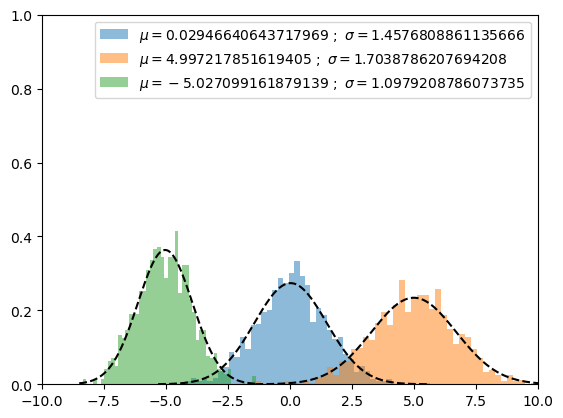

In [8]:
train_gmm(X, n_compenents=3, n_steps=50, plot_intermediate_steps_flag=True)
